<a href="https://colab.research.google.com/github/Harsha77064/Rapidious-Assignment/blob/main/Healthy_Recipe_Recommendation_using_Epirecpie_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')


In [11]:
epicurious = pd.read_csv("epi_r.csv")

In [14]:
epicurious.head(2)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
epicurious.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 680 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    title                     object 
 1    rating                    float64
 2    calories                  float64
 3    protein                   float64
 4    fat                       float64
 5    sodium                    float64
 6    #cakeweek                 float64
 7    #wasteless                float64
 8    22-minute meals           float64
 9    3-ingredient recipes      float64
 10   30 days of groceries      float64
 11   advance prep required     float64
 12   alabama                   float64
 13   alaska                    float64
 14   alcoholic                 float64
 15   almond                    float64
 16   amaretto                  float64
 17   anchovy                   float64
 18   anise                     float64
 19   anniversary               float64
 20   anth

In [16]:
epicurious.describe().T


,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,15935.0,6322.958017,359046.041242,0.0,198.00,331.000,586.000,30111218.0
protein,15890.0,100.160793,3840.318527,0.0,3.00,8.000,27.000,236489.0
fat,15869.0,346.877497,20456.106859,0.0,7.00,17.000,33.000,1722763.0
sodium,15933.0,6225.974895,333318.188891,0.0,80.00,294.000,711.000,27675110.0
...,...,...,...,...,...,...,...,...
cookbooks,20052.0,0.000150,0.012231,0.0,0.00,0.000,0.000,1.0
leftovers,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0
snack,20052.0,0.001396,0.037343,0.0,0.00,0.000,0.000,1.0
snack week,20052.0,0.000948,0.030768,0.0,0.00,0.000,0.000,1.0


In [17]:
epicurious = epicurious[epicurious['calories'] < 10000].dropna()

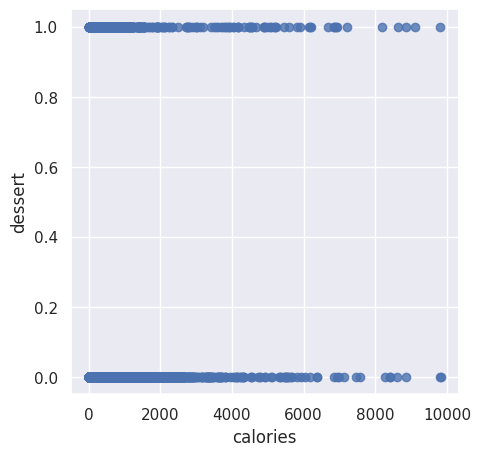

In [18]:
sns.set(style="darkgrid")
g = sns.regplot(x="calories", y="dessert", data=epicurious, fit_reg=False)
g.figure.set_size_inches(5, 5)

In [19]:
epicurious = epicurious[:][:500]

In [20]:
epicurious.drop("title", inplace = True, axis=1)

y = epicurious.dessert.values
X = epicurious.drop(["dessert"], axis = 1)

In [21]:
epicurious['dessert'].isnull().sum()

0

**Logistic Regression**

In [28]:
model1= LogisticRegression(solver = "liblinear")
loj_model = model1.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [29]:
loj_model.intercept_      # constant value
loj_model.coef_

array([[-6.98825662e-02,  8.59917045e-03, -1.33961323e-01,
        -7.35140448e-02, -2.38251246e-03,  0.00000000e+00,
         0.00000000e+00, -8.27125541e-04,  0.00000000e+00,
        -2.05573553e-03,  3.01229470e-02,  0.00000000e+00,
         0.00000000e+00, -6.28363973e-01, -1.70998310e-01,
         3.42252331e-02,  0.00000000e+00,  1.76760011e-02,
         2.03925837e-01,  0.00000000e+00,  0.00000000e+00,
        -7.35986229e-01,  1.10345385e-01,  1.09449158e-01,
        -1.64320033e-02,  0.00000000e+00, -2.39848247e-02,
        -3.75441394e-02, -9.56292940e-03, -1.30363887e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.89268428e-02,  2.21139102e-03, -2.82610950e-01,
        -8.82683739e-02,  1.32484063e+00, -2.47737951e-01,
         0.00000000e+00, -1.48256288e-01,  0.00000000e+00,
        -5.74720379e-03, -8.66290046e-02, -6.85157697e-02,
         2.58804411e-05, -1.32883137e-03, -4.21473194e-03,
         8.90879105e-02, -5.62058638e-02, -2.42535796e-0

In [24]:
loj_model.predict(X)[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

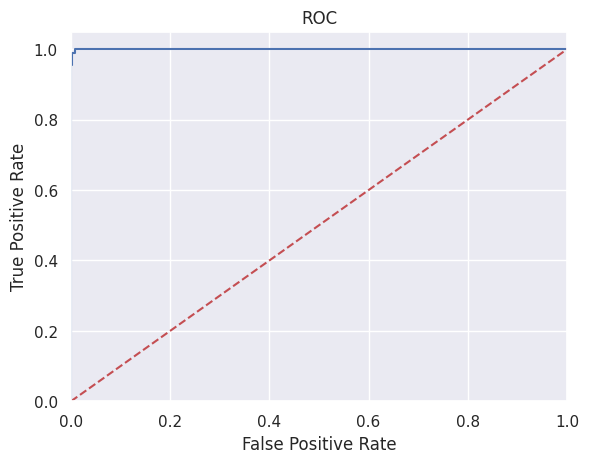

In [35]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [42]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [43]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9666666666666667

In [44]:
y_pred = loj_model.predict(X)        # predict
confusion_matrix(y, y_pred)

array([[412,   0],
       [  5,  83]])

In [45]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       412
         1.0       1.00      0.94      0.97        88

    accuracy                           0.99       500
   macro avg       0.99      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500



In [46]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9199999999999999

**GaussianNB**

In [47]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [48]:
nb_model.predict(X_test)[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0.])

In [50]:
nb_model.predict_proba(X_test)[0:10]

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 6.32353549e-295],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.25607727e-166],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [51]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

In [52]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.78

**KNN**

In [53]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [54]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7533333333333333

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       122
         1.0       0.26      0.18      0.21        28

    accuracy                           0.75       150
   macro avg       0.54      0.53      0.53       150
weighted avg       0.72      0.75      0.73       150



In [56]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [57]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [60]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.8400000000000001
Best parameters: {'n_neighbors': 4}


In [61]:
knn = KNeighborsClassifier(4)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)

0.7866666666666666

In [62]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7866666666666666

**Random Forest**

In [63]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [64]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

In [65]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [66]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

In [69]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [70]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                  max_features = 8,
                                  min_samples_split = 5,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=5,
                       n_estimators=10)

In [71]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.82

In [72]:
# prompt: code for SVC

# SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.94

In [83]:
from sklearn.tree import plot_tree

[Text(0.8363636363636363, 0.9705882352941176, 'x[93] <= 0.5\ngini = 0.284\nsamples = 350\nvalue = [290, 60]'),
 Text(0.8, 0.9117647058823529, 'x[310] <= 0.5\ngini = 0.225\nsamples = 333\nvalue = [290, 43]'),
 Text(0.6727272727272727, 0.8529411764705882, 'x[128] <= 0.5\ngini = 0.134\nsamples = 291\nvalue = [270, 21]'),
 Text(0.6, 0.7941176470588235, 'x[51] <= 0.5\ngini = 0.1\nsamples = 283\nvalue = [268, 15]'),
 Text(0.5636363636363636, 0.7352941176470589, 'x[501] <= 0.5\ngini = 0.088\nsamples = 281\nvalue = [268, 13]'),
 Text(0.5272727272727272, 0.6764705882352942, 'x[596] <= 0.5\ngini = 0.076\nsamples = 279\nvalue = [268, 11]'),
 Text(0.45454545454545453, 0.6176470588235294, 'x[388] <= 0.5\ngini = 0.063\nsamples = 276\nvalue = [267, 9]'),
 Text(0.41818181818181815, 0.5588235294117647, 'x[460] <= 0.5\ngini = 0.056\nsamples = 275\nvalue = [267, 8]'),
 Text(0.38181818181818183, 0.5, 'x[664] <= 0.5\ngini = 0.05\nsamples = 274\nvalue = [267, 7]'),
 Text(0.34545454545454546, 0.4411764705882

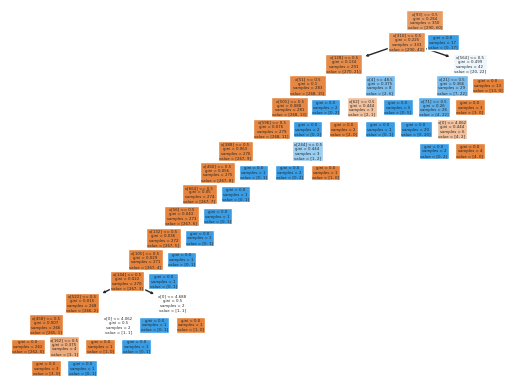

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_tree=model1.predict(X_test)
plot_tree(tree_model,filled=True)

In [92]:

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       122
         1.0       0.85      0.79      0.81        28

    accuracy                           0.93       150
   macro avg       0.90      0.88      0.89       150
weighted avg       0.93      0.93      0.93       150



In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(X_test)


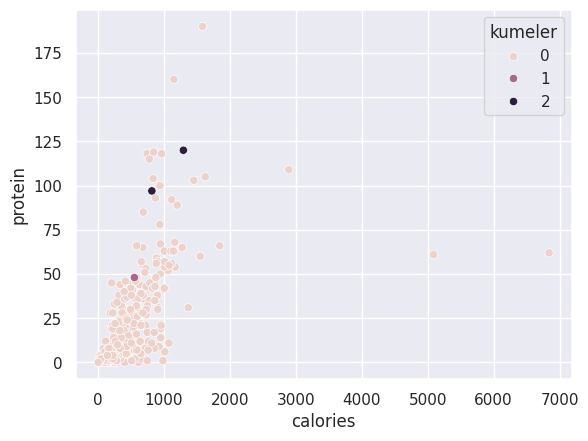

In [98]:
import matplotlib.pyplot as plt
sns.scatterplot(x="calories", y="protein", hue="kumeler", data=epicurious)
plt.show()


In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_classes))
model.summary()

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7054 - loss: 0.7684
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4163 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8869 - loss: 0.3385 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.4213  
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9327 - loss: 0.3063 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.2713 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9081 - loss: 0.2746 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9255 - loss: 0.3432  
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9306 - loss: 0.2017 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9224 - loss: 0.2171 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9340 - loss: 0.2236  
Test accuracy: 0.9399999976158142


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       122
         1.0       0.83      0.86      0.84        28

    accuracy                           0.94       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.94      0.94      0.94       150



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │          43,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,709 (534.02 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,140 (356.02 KB)